# **Automate Identification And Recognition Of Handwritten Text from An Image.**
(Using a Multistream Convolutional Neural Network)




---


**Name Of The Student** : SAUBHAGYAJEET SAHOO

**Internship Project Topic** : Automate identification and recognition of handwritten text from an image

**Name of the Organization** : TCS iON

**Name of the Industry Mentor** : Anamika Chatterjee

**Name of the Institute** : DRIEMS GROUP OF INSTITUTION , TANGI , CUTTACK

---



# PROJECT OVERVIEW

---
The aim of the project is to build a program which is able to identify and recognize hand writeen text from an image. 



# Create a Database
Step1 - Download the data from the IAM Database "http://www.fki.inf.unibe.ch/databases/iam-handwriting-database".

Step2 - Download the "forms.txt" from the ascii folder.

Step3 - Make a Folder (Ex-datase_rio)

Step4 - Unzip the downloaded data into a Folder inside the created Folder. (Ex- datase_rio/sentences)

Step5 - Move the "forms.txt" file to the created folder.(Ex- datase_rio/forms.txt)

***For Online pupose upload the folder into your google drive***
  

# Create the Program

---



If you are creating the program online in Google Colab mount the goole drive 

In [1]:
# Mounting google drive into the program. 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Step1 - Create a dictionary to store each form ID and its writer.

In [2]:
import os
from itertools import islice
form_writer = {}
forms_file_path ="gdrive/My Drive/datase_rio/forms.txt" # Enter the path of the form file. 
with open(forms_file_path) as f:
    for line in islice(f, 16, None):
        line_list = line.split(' ')
        form_id = line_list[0]
        writer = line_list[1]
        form_writer[form_id] = writer

In [3]:
list(form_writer.items())[0:5] # Visualize dictionary (as array for simplicity)

[('a01-020x', '010'),
 ('a01-026', '009'),
 ('a01-026u', '000'),
 ('a01-026x', '008'),
 ('a01-030', '005')]

Step2 - Select the most common writer

In [4]:
from collections import Counter

top_writers = []
num_writers = 50 # Enter the number of writers from 221 you want to make dataset of.
writers_counter = Counter(form_writer.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

In [5]:
print(top_writers[0:5]) # Visualize the writer id of the top 50 writers.

['000', '150', '151', '152', '153']


Step3 - From the selected most common writers, we will now need to select the forms (sentences) they have written.



In [6]:
top_forms = []
for form_id, author_id in form_writer.items():
    if author_id in top_writers:
        top_forms.append(form_id)

In [7]:
print(top_forms[0:5]) # Visualize the form id of the top 50 writers:

['a01-026u', 'a01-030u', 'a01-043u', 'a01-049u', 'a01-049x']


Step4 - 
Create a temp directory which contains only the sentences of the forms selected above.

In [8]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = "gdrive/My Drive/datase_rio/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = "gdrive/My Drive/datase_rio/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

Step5 - Create arrays of file inputs (a form) and their respective targets (a writer id):



In [9]:
import numpy as np

img_files = np.zeros((0), dtype=np.str)
img_targets = np.zeros((0), dtype=np.str)
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in form_writer:
        if key == form_id:
            img_targets = np.append(img_targets, form_writer[form_id])

Step6 - Visualize the form -> writer id arrays:

In [10]:
print(img_files[0:5]) 
print(img_targets[0:5])

['gdrive/My Drive/datase_rio/temp_sentences/m06-019-s09-00.png'
 'gdrive/My Drive/datase_rio/temp_sentences/m06-019-s06-00.png'
 'gdrive/My Drive/datase_rio/temp_sentences/m06-019-s05-00.png'
 'gdrive/My Drive/datase_rio/temp_sentences/m06-031-s02-00.png'
 'gdrive/My Drive/datase_rio/temp_sentences/m06-031-s03-00.png']
['551' '551' '551' '552' '552']


Step7 - 
Visualize dataset's images

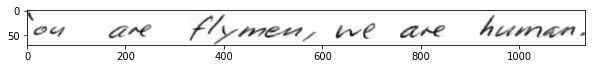

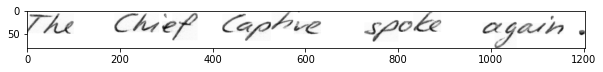

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')

Step8 - Encode writers with a value between 0 and n_classes-1

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_img_targets = encoder.transform(img_targets)

print("Writer ID        : ", img_targets[:2])
print("Encoded writer ID: ", encoded_img_targets[:2])

Writer ID        :  ['551' '551']
Encoded writer ID:  [42 42]


Step9 - Split dataset into train, validation, and tests sets

In [13]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_files, encoded_img_targets, test_size=0.2, shuffle = True)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle = True)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(3096,) (775,) (968,)
(3096,) (775,) (968,)


Step10 - 
Define a couple of constants that will be used throughout the model

In [14]:
CROP_SIZE = 113
NUM_LABELS = 50
BATCH_SIZE = 16

Step11 - Cropping the inputed Data(Text image)

In [15]:
from sklearn.utils import shuffle
from PIL import Image
import random

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return (images, labels)

Step12  - Visualizing what the get_augmented_sample method does by augmenting one sample from the training set.

Label:  32


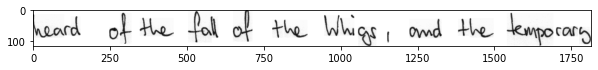

In [16]:
sample, label = X_train[0], y_train[0]
img = mpimg.imread(sample)
plt.figure(figsize = (10,10))
plt.imshow(img, cmap ='gray')
print("Label: ", label)

In [17]:
images, labels = get_augmented_sample(sample, label, 0.1) # Augment it and seeing the result.

In [18]:
print(labels) # The labels returned by the get_augmented_sample is simply the label of the original image for each cropped patch:
print("Num of labels: ", len(labels))

[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Num of labels:  165


165


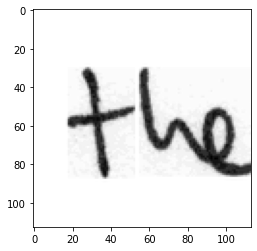

In [19]:
print(len(images)) # The images returned by it are the random patches created from the original image (only two samples shown for simplicity)
plt.imshow(images[0], cmap ='gray')

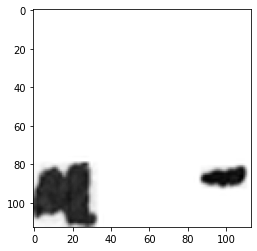

In [ ]:
plt.imshow(images[1], cmap ='gray') 

Step13 - Creating a  generator program in order to be able to call get_augmented_sample when training the mode

In [20]:
import operator
from functools import reduce
from keras.utils import to_categorical

def generate_data(samples, labels, batch_size, sample_ratio):
    while 1: 
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:(offset + batch_size)]
            batch_labels = labels[offset:(offset + batch_size)]
            
            # Augment each sample in batch
            augmented_batch_samples = []
            augmented_batch_labels = []
            for i in range(len(batch_samples)):
                sample = batch_samples[i]
                label = batch_labels[i]
                augmented_samples, augmented_labels = get_augmented_sample(sample, label, sample_ratio)
                augmented_batch_samples.append(augmented_samples)
                augmented_batch_labels.append(augmented_labels)

            # Flatten out samples and labels
            augmented_batch_samples = reduce(operator.add, augmented_batch_samples)
            augmented_batch_labels = reduce(operator.add, augmented_batch_labels)
            
            # Reshape input format
            X_train = np.array(augmented_batch_samples)
            X_train = X_train.reshape(X_train.shape[0], CROP_SIZE, CROP_SIZE, 1)

            # Transform input to float and normalize
            X_train = X_train.astype('float32')
            X_train /= 255

            # Encode y
            y_train = np.array(augmented_batch_labels)
            y_train = to_categorical(y_train, NUM_LABELS)

            yield X_train, y_train

Using TensorFlow backend.


Step14 - Create training, validation, and test generators

In [21]:
train_generator = generate_data(X_train, y_train, BATCH_SIZE, 0.3)
validation_generator = generate_data(X_val, y_val, BATCH_SIZE, 0.3)
test_generator = generate_data(X_test, y_test, BATCH_SIZE, 0.1)


In [22]:
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
tf.compat.v1.Session(config = config)

In [23]:
def resize_image(img): # Function to resize image.
    size = round(CROP_SIZE/2)
    return tf.image.resize(img, [size, size])

Step15 - Build a neural network in Keras

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, Activation
from keras.layers.convolutional import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.optimizers import Adam
from keras import metrics

model = Sequential()

# Define network input shape
model.add(ZeroPadding2D((1, 1), input_shape=(CROP_SIZE, CROP_SIZE, 1)))
# Resize images to allow for easy computation
model.add(Lambda(resize_image)) 

# CNN model - Building the model suggested in paper
model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2, 2), padding='same', name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3, 3), strides= (1, 1), padding='same', name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3, 3), strides= (1, 1), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_LABELS, name='output'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['acc'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 115, 115, 1)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 56, 56, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)       

Step16 - The model is trained for given number of epochs and the models obtained after each epoch are saved to the ./model_checkpoints directory

In [ ]:
from keras.callbacks import ModelCheckpoint

# Create directory to save checkpoints at
model_checkpoints_path = "gdrive/My Drive/model_checkpoints"
if not os.path.exists(model_checkpoints_path):
    os.makedirs(model_checkpoints_path)
    
# Save model after every epoch using checkpoints
create_checkpoint = ModelCheckpoint(
    filepath = "gdrive/My Drive/model_checkpoints/check_{epoch:02d}_{val_loss:.4f}.hdf5",
    verbose = 1,
    save_best_only = False
)

# Fit model using generators
history_object = model.fit_generator(
    train_generator, 
    steps_per_epoch = round(len(X_train) / BATCH_SIZE),
    validation_data = validation_generator,
    validation_steps = round(len(X_val) / BATCH_SIZE),
    epochs = 200,
    verbose = 1,
    callbacks = [create_checkpoint]
)

Epoch 1/200
194/194 [==============================] - 649s 3s/step - loss: 3.5396 - acc: 0.2034 - val_loss: 2.6951 - val_acc: 0.2136

Epoch 00001: saving model to gdrive/My Drive/model_checkpoints/check_01_2.6951.hdf5
Epoch 2/200
194/194 [==============================] - 107s 550ms/step - loss: 2.8753 - acc: 0.2519 - val_loss: 2.5535 - val_acc: 0.2669

Epoch 00002: saving model to gdrive/My Drive/model_checkpoints/check_02_2.5535.hdf5
Epoch 3/200
194/194 [==============================] - 107s 549ms/step - loss: 2.4753 - acc: 0.3052 - val_loss: 2.3897 - val_acc: 0.3390

Epoch 00003: saving model to gdrive/My Drive/model_checkpoints/check_03_2.3897.hdf5
Epoch 4/200
194/194 [==============================] - 105s 544ms/step - loss: 2.1867 - acc: 0.3636 - val_loss: 2.1029 - val_acc: 0.4249

Epoch 00004: saving model to gdrive/My Drive/model_checkpoints/check_04_2.1029.hdf5
Epoch 5/200
194/194 [==============================] - 105s 540ms/step - loss: 1.9843 - acc: 0.4115 - val_loss: 2.5

Step17 - Load a saved model weights and use them to predict labels.

In [25]:
model_weights_path = "gdrive/My Drive/model_checkpoints/check_184_0.1748.hdf5"
if model_weights_path:
    model.load_weights(model_weights_path)
    scores = model.evaluate_generator(test_generator, steps=round(len(X_test)/BATCH_SIZE))
    print("Accuracy: ", scores[1] , " ::" , len(scores))
else:
    print("Set model weights file to load in the 'model_weights_path' variable")

Accuracy:  0.92054682970047  :: 2
